<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/10_decision_trees/3_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

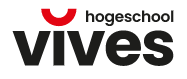<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# **BESLISSINGSBOMEN - ID3 ALGORITME**

De tekst van deze notebook is grotendeels overgenomen van het hoofdstuk "Beslissingsbomen" van het vak Data Science I gedoceerd aan de Karel de Grote Hogeschool van Antwerpen en opgesteld door Wouter Deketelaere in 2017. De rekenvoorbeelden in de tekst werden aanvullend met Python gecodeerd.

## Inleiding

Een **beslissingsboom** (Engels: decision tree) is een grafsch hulpmiddel dat kan gebruikt worden om besluitvorming te faciliteren. Er bestaan meerdere machine learning algoritmes die beslissingsbomen kunnen produceren op basis van een trainingset van voorbeelden. Elk voorbeeld in de trainingset wordt ook wel een **instantie** genoemd. Hoe dit in zijn werk gaat wordt uitgelegd in deze notebook.

Eens de beslissingsboom geconstrueerd is kan die gebruikt worden als model om bijvoorbeeld de classifcatie uit te voeren van ongekende instanties. Dit heeft heel veel praktische toepassingen gaande van het voorspellen van interessante tijdstippen om aandelen te kopen, het bepalen of iemand kredietwaardig is bij het afsluiten van een lening, het detecteren van tumoren in foto's, het voorspellen van de slaagkans van studenten voor een bepaald vak, enzovoort.

Reeds in de jaren '70 van de vorige eeuw werden de grondbeginselen van beslissingsbomen door Breiman et al. (1984) gelegd. Het bekendste algoritme om beslissingsbomen te maken, **ID3** genaamd, is van de hand van Quinlan (1986). Later, in de jaren '90 heeft Quinlan dit algoritme verbeterd onder de naam **C4.5**, zodat het ook toegepast kan worden op continue gegevens en op gegevens met ontbrekende waarden, missing values in het Engels (Salzberg, 1994).

In dit hoofdstuk bestuderen we dus wat een beslissingsboom juist is, en leren we hoe we een beslissingsboom kunnen opstellen m.b.v. het ID3 algoritme vertrekkende van een verzameling traininggegevens.

## Definitie

Zoals het woord beslissingsboom laat uitschijnen, is het een boomachtige structuur, die echter ondersteboven staat, en die bestaat uit **knooppunten** die verbonden zijn door **benoemde pijlen**. Elk knooppunt stemt overeen met een plaats waar een beslissing genomen moet worden. De uiteinden van een beslissingsbomen zijn knooppunten zonder vertrekkende pijlen en deze worden **bladknooppunten** genoemd. Elk knooppunt bevat de naam van een eigenschap (Engels: **attribute**) van de gegevens op basis waarvan voorbeelden kunnen gescheiden worden van elkaar. Een bladknooppunt bevat de uitkomst (Engels: **target**) waartoe het voorbeeld behoort.

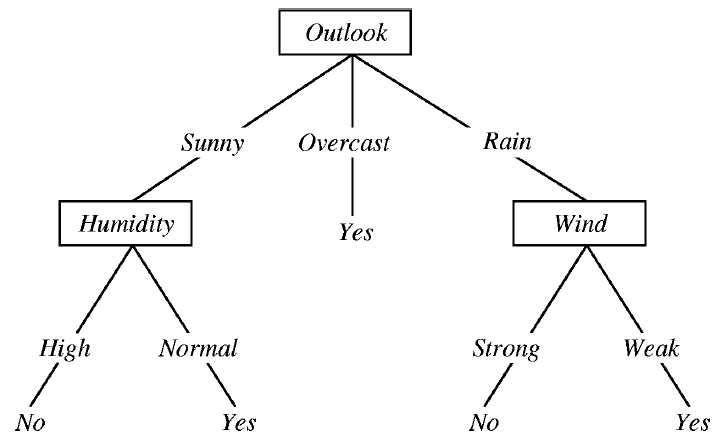

De figuur is een voorbeeld van een in de literatuur wel héél bekende beslissingsboom. Deze beslissingsboom is het resultaat van de toepassing van het ID3 algoritme op de traininggegevens die we terugvinden in het bestand `play.txt`:

In [ ]:
import pandas as pd

play = pd.read_csv('play.txt', sep=' ').iloc[:, :-1]  # laatste kolom weggooien...
play

,Day,Outlook,Temperature,Humidity,Wind,Play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


Het doel van de beslissingsboom is om te bepalen of een
persoon zal gaan sporten (de 'Play'-eigenschap met waarden `'Yes'` of `'No'`) op basis van de overige eigenschappen ('Outlook', 'Temperature', 'Humidity' en 'Wind') van een dag. Het ID3 algoritme leert de kennis die verborgen zit in deze tabel en bouwt er een model van. Dat model kan dan gebruikt worden om te bepalen of iemand zal gaan sporten op dag 15, 16, ... door enkel gebruik te maken van de overige eigenschappen van die dagen. Merk op dat alle eigenschappen in dit voorbeeld een nominaal of ordinaal meetniveau hebben, maar in het algemene geval hoeft dit niet zo te zijn.

## ID3 algoritme

Je vraagt nu waarschijnlijk af hoe je zo'n beslissingsboom kan opstellen? We zullen dit probleem
in stappen aanpakken en sommige van die stappen vergen op hun beurt weer een aantal onderliggende stappen.

Dit zijn de stappen die we onderscheiden:
1. Selecteer de beste eigenschap op basis van de gegevens die je beschouwt.
2. Maak een knooppunt met de naam van deze eigenschap erin.
3. Trek een pijl vanuit dit knooppunt voor elke waarde die de gekozen eigenschap kan aannemen.
4. Verdeel de voorbeelden in verzamelingen naargelang de waarde die ze hebben van de gekozen eigenschap.
5. Herhaal het algoritme voor elk van de bekomen deelverzamelingen van de gegevens.
6. Stop wanneer een deelverzameling nog slechts voorbeelden bevat met één en dezelfde uitkomst.

Dit is dus een recursief algoritme dat bekend is onder de naam ID3. Het ID3 algoritme werkt alleen voor gegevens met meetniveau's die nominaal of ordinaal zijn. Als je toch gegevens hebt op een hoger meetniveau zoals interval of ratio, dan zal je eerst klassen moeten aanmaken. Een andere term voor het aanmaken van klassen is *discretiseren*; in softwarepakketten kom je vaak deze laatste benaming tegen. Eens al je eigenschappen gediscretiseerd zijn kan je weer gebruik maken van het ID3 algoritme om een beslissingsboom op te stellen.

We geven een voorbeeldje om de stappen in het algoritme te verduidelijken:
1. Selecteer eigenschap 'Outlook'.
2. Maak een knooppunt met naam de 'Outlook'.
3. Teken drie benoemde pijlen die vertrekken vanuit het knooppunt: een pijl met 'Sunny', 'Overcast' en 'Rain'.
4. We bekomen drie deelverzamelingen van de oorspronkelijke verzameling van gegevens:
  * D1, D2, D8, D9, D11
  * D3, D7, D12, D13
  * D4, D5, D6, D10, D14
5. We herhalen het algoritme voor deelverzamelingen 1 en 3.
6. We stoppen het algoritme voor deelverzameling 2 want deze hebben allen dezelfde uitkomst `'Yes'`.

## Entropie en Information Gain

In het bovenstaande algoritme hebben we verzwegen hoe we de beste eigenschap konden selecteren. Er zijn verschillende manieren waarop de 'beste' eigenschap geselecteerd kan worden. We bekijken in de volgende paragraaf één van de meeste bekende technieken die gebaseerd is op de begrippen *entropie* en *information gain*.

### Entropie

De entropie van een tabel van gegevens is een maat voor de zuiverheid van de gegevens, gemeten volgens een bepaalde eigenschap. Als je het ID3 algoritme van hierboven nog eens herleest, zal je merken dat de stopconditie gebaseerd is op entropie: je stopt met het uitbreiden van de beslissingsboom wanneer 'allen dezelfde uitkomst hebben'. Entropie zal ons een exact
wiskundige manier geven om dit te kunnen berekenen.

**Definitie**:

> $E(S) = \sum_{v \in A} - \dfrac{|S_{A=v}|}{|S|}.log_2 \dfrac{|S_{A=v}|}{|S|}$

(formule 1)


De formule ziet er nogal indrukwekkend uit, maar in feite is ze veel eenvoudiger dan ze laat
uitschijnen. We bekijken de verschillende onderdelen en passen ze toe op ons voorbeeld.

Eerst moeten we begrijpen waarvoor elk symbool staat:

- $S$ is de verzameling (Engels: set) van gegevens, onze dataset. Dit is niets anders dan de tabel van
gegevens die we ingelezen hebben als dataframe.
- $E$ staat voor entropie. Bij binaire variabelen is dit een getal tussen 0 en 1 dat aangeeft hoe zuiver de verzameling $S$ van gegevens is: 0 komt overeen met een helemaal zuivere verzameling en 1 met een
maximale onzuivere verzameling.
- $A$ staat voor attribuut of eigenschap. Dit is het attribuut waarvan we de zuiverheid willen
berekenen, bijvoorbeeld $A$ = 'Play'.
- $v$ staat voor value. Het is in feite een variabele die alle waarden van $A$ kan aannemen. In
het geval van $A$ = 'Play' kan $v$ de waarden `'Yes'` en `'No'` aannemen.
- $|S_{A=v}|$ is het aantal instanties (of rijen in onze tabel) die de waarde $v$ hebben voor attribuut
$A$.
- $|S|$ is het totaal aantal instanties, dus het totaal aantal rijen in de tabel.
- $\dfrac{|S_{A=v}|}{|S|}$ is dus eigenlijk een relatieve frequentie, wat men als kans kan interpreteren!

We berekenen de entropie $E$ van de gegevens $S$ waarbij we 'Play' als het target attribuut (of label) beschouwen:

> $E(S) = \sum_{v \in \{Yes, No\}} - \dfrac{|S_{Play=v}|}{|S|}.log_2 \dfrac{|S_{Play=v}|}{|S|}$

> $E(S) = -\dfrac{9}{14}.log_2 \dfrac{9}{14} -\dfrac{5}{14}.log_2 \dfrac{5}{14} = 0.94$

Laten we dat nu eens coderen:

In [ ]:
n = len(play)  # totaal aantal rijen
n_yes = (play['Play'] == 'Yes').sum()  # aantal Play = 'Yes'
n_no = (play['Play'] == 'No').sum()  # aantal Play = 'No'

print('totaal aantal:', n)
print("aantal 'Yes':", n_yes)
print("aantal 'No':", n_no)

totaal aantal: 14
aantal 'Yes': 9
aantal 'No': 5


In [ ]:
import numpy as np

f_yes = n_yes / n
f_no = n_no / n
E = -f_yes * np.log2(f_yes) - f_no * np.log2(f_no)  # pas op! log2!!
print('E =', E)

E = 0.9402859586706311


We kunnen dat natuurlijk generieker schrijven in een functie `entropy`:

In [ ]:
def entropy(df, target):
    n = len(df)
    E = 0.0
    for v in np.unique(df[target]):
        f = (df[target] == v).sum() / n
        E -= f * np.log2(f)
    return E

print('E =', entropy(play, 'Play'))

E = 0.9402859586706311


Maar we kunnen dat ook vectoriseren en in één lijn code schrijven!

In [ ]:
E = lambda x: -x * np.log2(x)
print('E =', (play.value_counts('Play') / len(play)).apply(E).sum())

E = 0.9402859586706311


De waarde die we vinden ligt dicht tegen 1. Dit betekent dat de het attribuut 'Play' zeer onzuiver is. Mochten er evenveel dagen zijn waarop er gesport wordt als dat er dagen zijn dat er niet gesport wordt, dan zou de entropie van 'Play' zelfs precies 1 geweest zijn (reken dit eens na).

De entropiecurve in onderstaande figuur toont hoe de entropie van een binaire variabele zoals 'Play' toeneemt tot 1 wanneer de kans op de beide waarden 0.5 wordt. (Herinner je dat een binaire variabele een toevalsveranderlijke is die slechts twee waarden kan aannemen.) In het geval van het 'Play'-attribuut is de kans op 'Yes' gelijk aan 9/14 = 0.64, en er is dus een iets hogere kans op 'Yes' dan op 'No'. Dit wordt dan ook gereflecteerd in de berekende waarde van E(S) die net iets lager is dan 1.

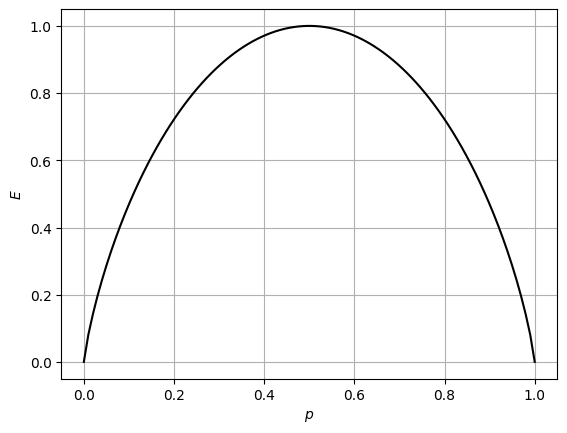

In [ ]:
from matplotlib import pyplot as plt

p = np.linspace(1e-10, 1-1e-10, 100)  # 1e-10 om delen door 0 te voorkomen!
E = -p * np.log2(p) - (1-p) * np.log2(1-p)

plt.plot(p, E, 'k-');
plt.grid()
plt.xlabel('$p$');
plt.ylabel('$E$');

### Information Gain

Met de information gain (IG) zullen voor elk attribuut kunnen quantifceren wat de winst zal zijn qua 'zuiverheidstoename' na splitsen van de gegevens op basis van de waarden van dat
attribuut. Hoe hoger de information gain voor een bepaald attribuut des te beter. We geven eerst de formele defnitie van information gain van een attribuut A.

**Definitie**:

> $IG(A) = E(S_{ouder}) - \sum_{v \in A} \dfrac{|S_{kind,v}|}{|S_{ouder}|}.E(S_{kind,v})$

(formule 2)

Deze formule ziet er wederom een beetje indrukwekkend uit, maar ook hier geldt weer dat het eigenlijk allemaal niet zo moeilijk is. Deze formule heeft een intuïtieve betekenis die het makkelijker maakt om ze te begrijpen. Verderop zullen we deze intuïtieve betekenis formuleren zodat je een beter inzicht kan krijgen in de betekenis ervan.

Om de berekeningswijze van information gain goed te begrijpen is het belangrijk dat je nu goed begrijpt wat het ID3 algoritme inhoudt. We willen een tabel $S$ met gegevens gebruiken om een beslissingsboom op te stellen. Omdat het een recursief algoritme is, zullen we telkens te maken hebben met een oudertabel $S_{ouder}$ en een aantal kindtabellen $S_{kind,v}$. De eerste oudertabel is de originele tabel $S$ met gegevens zoals bijvoorbeeld het dataframe dat we hierboven uit de file "play.txt" hebben ingelezen. Voor elk attribuut $A$ waarvoor je de information gain gaat berekenen zullen kindtabellen ontstaan: één kindtabel per waarde $v$ die het attribuut $A$ kan aannemen. Wanneer alle information gains berekend zijn, kan de splitsing van de tabel gebeuren op basis van het attribuut met de grootste information gain. De kindtabellen die dan ontstaan zullen op hun beurt gaan dienen als oudertabel en het algoritme stopt pas als alle kindtabellen zuiver zijn. Met andere woorden zolang een kindtabel niet zuiver is, wordt het een oudertabel en gaat het splitsen door.

In het voorbeeld van de weergegevens heb je voor de berekening van de information gain van het attribuut "Outlook" drie kindtabellen, één voor elke waarde die het attribuut "Outlook" kan aannemen:

In [ ]:
for v in np.unique(play['Outlook']):   # overloop alle waarden voor 'Outlook'
    print(play[play['Outlook'] == v])  # kindtabel
    print()

    Day   Outlook Temperature Humidity    Wind Play
2    D3  Overcast         Hot     High    Weak  Yes
6    D7  Overcast        Cool   Normal  Strong  Yes
11  D12  Overcast        Mild     High  Strong  Yes
12  D13  Overcast         Hot   Normal    Weak  Yes

    Day Outlook Temperature Humidity    Wind Play
3    D4    Rain        Mild     High    Weak  Yes
4    D5    Rain        Cool   Normal    Weak  Yes
5    D6    Rain        Cool   Normal  Strong   No
9   D10    Rain        Mild   Normal    Weak  Yes
13  D14    Rain        Mild     High  Strong   No

    Day Outlook Temperature Humidity    Wind Play
0    D1   Sunny         Hot     High    Weak   No
1    D2   Sunny         Hot     High  Strong   No
7    D8   Sunny        Mild     High    Weak   No
8    D9   Sunny        Cool   Normal    Weak  Yes
10  D11   Sunny        Mild   Normal  Strong  Yes



Voor elk van deze kindtabellen kan je de entropie $E(S_{kind,v})$ berekenen met formule 1 die we hierboven hebben gegeven. De entropie van de oudertabel $E(S_{ouder})$ hebben we reeds hierboven berekend. We moet dus nog de entropie voor alle kindtabellen berekenen.

1. Kindtabel 'Sunny':

> $E(S_{Sunny}) = \sum_{v \in \{Yes, No\}} - \dfrac{|S_{Sunny,Play=v}|}{|S_{Sunny}|}.log_2 \dfrac{|S_{Sunny,Play=v}|}{|S_{Sunny}|}$

> $E(S_{Sunny}) = -\dfrac{2}{5}.log_2 \dfrac{2}{5} -\dfrac{3}{5}.log_2 \dfrac{3}{5} = 0.97$

2. Kindtabel 'Rain':

> $E(S_{Rain}) = \sum_{v \in \{Yes, No\}} - \dfrac{|S_{Rain,Play=v}|}{|S_{Rain}|}.log_2 \dfrac{|S_{Rain,Play=v}|}{|S_{Rain}|}$

> $E(S_{Rain}) = -\dfrac{3}{5}.log_2 \dfrac{3}{5} -\dfrac{2}{5}.log_2 \dfrac{2}{5} = 0.97$

3. Kindtabel 'Overcast':

> $E(S_{Overcast}) = \sum_{v \in \{Yes, No\}} - \dfrac{|S_{Overcast,Play=v}|}{|S_{Overcast}|}.log_2 \dfrac{|S_{Overcast,Play=v}|}{|S_{Overcast}|}$

> $E(S_{Overcast}) = -\dfrac{4}{4}.log_2 \dfrac{4}{4} -\dfrac{0}{4}.log_2 \dfrac{0}{4} = 0$


Uiteraard kunnen we dat ook coderen zoals we hierboven al hebben gedaan:

In [ ]:
for v in np.unique(play['Outlook']):  # overloop alle waarden voor 'Outlook'
    child = play[play['Outlook'] == v]  # kindtabel
    E_child = (child.value_counts('Play') / len(child)).apply(E).sum()
    print('E(Outlook=', v,') = ', E_child, sep='')  # Entropie van de kindtabel

E(Outlook=Overcast) = 0.0
E(Outlook=Rain) = 0.9709505944546686
E(Outlook=Sunny) = 0.9709505944546686


De intuïtieve betekenis van infomation gain is nu als volgt te begrijpen: de information gain is gelijk aan de onzuiverheid van de originele tabel $S_{ouder}$ verminderd met het gewogen gemiddelde van de onzuiverheden van de kindtabellen $S_{kind,v}$. Onze oudertabel is redelijk onzuiver, want $E=$ 0.94. Na splitsing op het attribuut 'Outlook' bekomen we drie kindtabellen waarvan er twee nog steeds redelijk onzuiver zijn: $E(S_{Sunny})=E(S_{Rain})=$ 0.97. De derde tabel is perfect zuiver want de entropie is nul: $E(S_{Overcast})=$ 0. Door het gewogen gemiddelde van de entropies te berekenen van de bekomen kindtabellen bekomen we dus één maatgetal dat de kwaliteit van de splitsing karateriseert in termen van zuiverheid.

Wat is nu die *gemiddelde* 'zuiverheidsgraadverandering' indien we zouden opsplitsen in deze drie tabellen? Wel, dat hangt natuurlijk af van hoe groot elke kindtabel is. Je voelt intuïtief aan dat elke kindtabel een groter aandeel zou moeten krijgen in de totale 'zuiverheidsgraadverbetering' wanneer dit een grote deeltabel is dan wanneer het maar een klein tabelletje is van bijvoorbeeld één rij. En de grootte van de kindtabel is natuurlijk relatief ten opzichte van de grootte
$|S_{ouder}|$ van de originele oudertabel $S_{ouder}$. Vandaar dat we in formule 2 het aantal elementen van elke kindtabel $|S_{kind,v}|$ verhouden tot het aantal elementen in de ouder tabel $|S_{ouder}|$. Door het verschil te nemen van de originele zuiverheid $E(S_{ouder})$ en de gewogen samengestelde zuiverheid
van de kindtabellen, bekomen we dus inderdaad een getal dat ons meedeelt hoeveel 'zuiverheidsverandering' er zal plaats vinden als we zouden splitsen op dat attribuut.

> $IG(Outlook) = E(S_{ouder}) - \sum_{v \in \{Sunny,Rain,Overcast\}} - \dfrac{|S_{kind,v}|}{|S_{ouder}|}.E(S_{kind,v})$

> $E(Outlook) = 0.94 - \dfrac{5}{14} . 0.97 - \dfrac{5}{14} . 0.97 - \dfrac{4}{14} . 0 = 0.25$


Uiteraard gaan we dat coderen en we doen dat netjes adhv een functie `information_gain`:

In [ ]:
def information_gain(parent, target, attr):
    """
    information gain berekenen voor ouder tabel 'parent' waarbij we 'target' voorspellen
    en willen splitsen op feature 'attr'

    parent: pandas DataFrame
    target: column name - string
    attr: column name - string
    """
    E = lambda x: -x * np.log2(x)  # entropie E
    n_parent = len(parent)  # aantal elementen in oudertabel
    E_parent = (parent.value_counts(target) / len(parent)).apply(E).sum()  # E oudertabel
    IG = E_parent  # initialiseren van information gain IG
    for v in np.unique(parent[attr]):  # overloop alle waarden voor attr
        child = parent[parent[attr] == v]  # kindtabel
        n_child = len(child)  # aantal element in kindtabel
        E_child = (child.value_counts(target) / len(child)).apply(E).sum()  # E kindtabel
        IG -= n_child / n_parent * E_child  # information gain IG updaten
    return IG  # output is IG

Laten we dat nu eens uittesten op de tabel 'play' waarbij we zoals hierboven splitsen op 'Outlook':

In [ ]:
information_gain(play, 'Play', 'Outlook')

0.24674981977443933

We krijgen inderdaad een information gain van 0.25 afgerond.

We moeten al deze berekeningen nu herhalen voor de resterende attributen "Temperature", "Humidity" en "Wind", en dat is behoorlijk wat werk als we dat manueel moeten doen, maar met onze functie `information_gain` van hierboven weten we daar gelukkig wel een mouw aan te passen:

In [ ]:
for attr in ['Outlook', 'Temperature', 'Humidity', 'Wind']:
    print('IG(', attr,') = ', information_gain(play, target='Play', attr=attr), sep='')

IG(Outlook) = 0.24674981977443933
IG(Temperature) = 0.02922256565895487
IG(Humidity) = 0.15183550136234164
IG(Wind) = 0.04812703040826949


De information gain van "Outlook" heeft de hoogste waarde. We splitsen de originele tabel dus op m.b.v. het "Outlook" attribuut in de drie kindtabellen die we hierboven hebben aangegeven. Nu pas kennen we de eerste node van onze beslissingsboom: een node gelabeled "Outlook" met drie uitgaande pijlen voor elk van de waarde die dat attribuut kan aannemen.

Herinner je dat de "Overcast" kindtabel perfect zuiver was (entropie was nul), dus die moeten we niet meer verder opsplitsen. De twee andere wel! Laten we beginnen met "Sunny":

In [ ]:
sunny = play[play['Outlook'] == 'Sunny']
sunny

,Day,Outlook,Temperature,Humidity,Wind,Play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
10,D11,Sunny,Mild,Normal,Strong,Yes


De information gain voor de verschillende attributen die overblijven:

In [ ]:
for attr in ['Temperature', 'Humidity', 'Wind']:
    print('IG(', attr,') = ', information_gain(sunny, target='Play', attr=attr), sep='')

IG(Temperature) = 0.5709505944546686
IG(Humidity) = 0.9709505944546686
IG(Wind) = 0.01997309402197489


Het is duidelijk dat we hier moeten splitsen op "Humidity"!

En tenslotte hebben we de "Rain" kindtabel:

In [ ]:
rain = play[play['Outlook'] == 'Rain']
rain

,Day,Outlook,Temperature,Humidity,Wind,Play
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
9,D10,Rain,Mild,Normal,Weak,Yes
13,D14,Rain,Mild,High,Strong,No


In [ ]:
for attr in ['Temperature', 'Humidity', 'Wind']:
    print('IG(', attr,') = ', information_gain(rain, target='Play', attr=attr), sep='')

IG(Temperature) = 0.01997309402197489
IG(Humidity) = 0.01997309402197489
IG(Wind) = 0.9709505944546686


Hier moeten we duidelijk splitsen op "Wind"!

En zo krijgen we uiteindelijk de beslissingsboom die we eerder al hebben laten zien:
- We kijken eerst naar "Outlook".
  - Als "Outlook" gelijk is aan "Sunny", dan kijken we naar "Humidity".
    - Als "Humidity" gelijk is aan "High", dan spelen we geen tennis.
    - Als "Humidity" gelijk is aan "Normal", dan spelen we wel tennis.
  - Als "Outlook" gelijk is aan "Overcast", dan spelen we tennis.
  - Als "Outlook" gelijk is aan "Rain", dan kijken we naar "Wind".
    - Als "Wind" gelijk is aan "Strong", dan spelen we geen tennis.
    - Als "Wind" gelijk is aan "Weak", dan spelen we wel tennis.

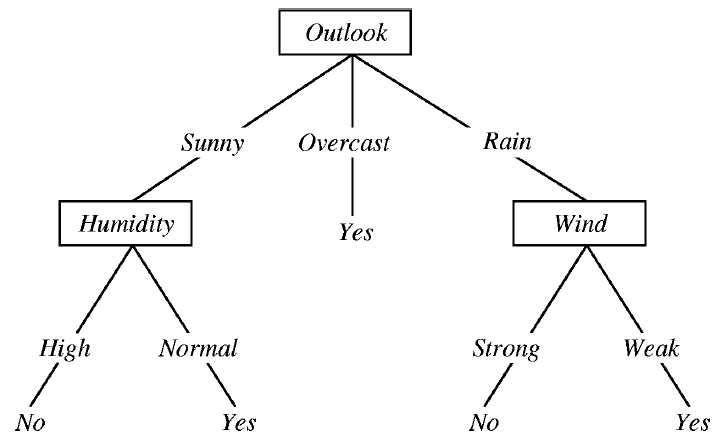

## Opdracht

Implementeer nu zelf het volledige ID3 algoritme in een functie of klasse waarbij je jouw code zo generiek mogelijk schrijft. D.w.z. dat je functie of klasse ook op een andere dataset kan toegepast worden en niet enkel op de dataset die we hier als voorbeeld hebben gebruikt!

---
---
## Bronnen

- Leo Breiman, Jerome Friedman, Charles J. Stone, and Richard A. Olshen. Classifcation and regression trees. CRC press, 1984.
- J. Ross Quinlan. Induction of decision trees. Machine learning, 1(1):81-106, 1986.
- Steven L Salzberg. C4.5: Programs for machine learning by J. Ross Quinlan. Morgan Kaufmann Publishers, inc., 1993. Machine Learning, 16(3):235-240, 1994.


---